In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Customer-Churn-Prediction.csv")

In [4]:
df.shape

(7043, 21)

## TRAIN_TEST_SPLIT

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train,test= train_test_split(df,train_size=0.70,random_state=42)

In [7]:
train.shape

(4930, 21)

In [8]:
test.shape

(2113, 21)

In [9]:
testing,validation=train_test_split(test,train_size=0.5,random_state=42)

In [10]:
testing.shape

(1056, 21)

In [11]:
validation.shape

(1057, 21)

## COPY

In [12]:
df1=df.copy()
df2=df.copy()
df3=df.copy()

## Let's Go

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(7043, 21)

In [18]:
not_churn=(5174/7043)*100
churn=(1869/7043)*100

In [19]:
print('Not churn {} percent of people'.format(not_churn))
print('Churn {} percent of people'.format(churn))

Not churn 73.4630129206304 percent of people
Churn 26.536987079369588 percent of people


<Axes: xlabel='count', ylabel='Churn'>

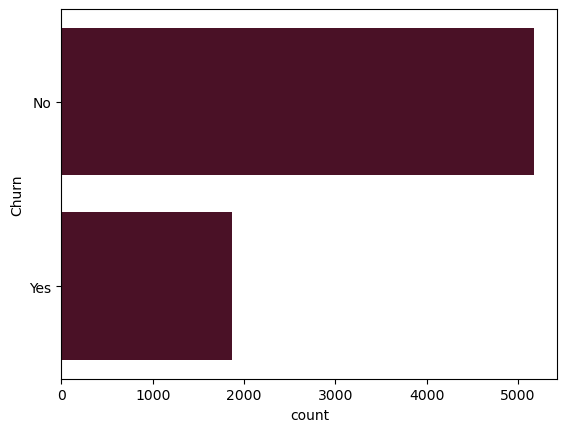

In [20]:
sns.countplot(df['Churn'],color='#540723')

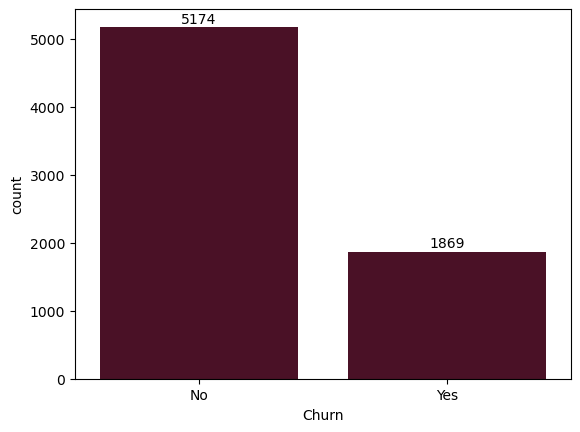

In [21]:
sns.countplot(x=df['Churn'],color='#540723')

for p in plt.gca().patches:
    plt.text(p.get_x()+p.get_width()/2,
             p.get_height() + 60,
             int(p.get_height()),
             ha='center'
             )

<Axes: xlabel='gender', ylabel='count'>

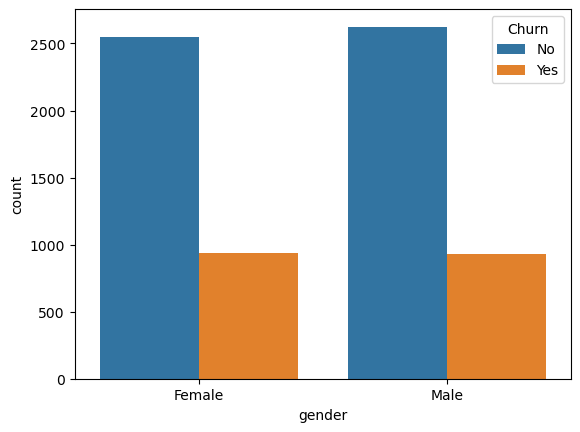

In [22]:
sns.countplot(x='gender',hue='Churn',data=df)

In [23]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

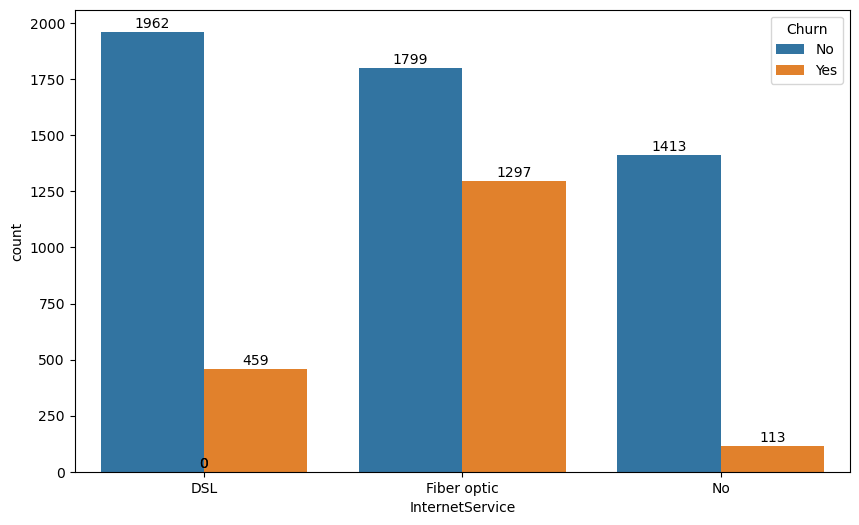

In [24]:
plt.subplots(figsize=(10,6))
sns.countplot(x='InternetService',hue='Churn',data=df)

for p in plt.gca().patches:
    plt.text( p.get_x() + p.get_width()/2,
              p.get_height() + 20,
              int(p.get_height()),
             ha='center'
              )

In [25]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

## Select Dtypes

In [26]:
df.select_dtypes(include=['number']).corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.01609,0.219856
tenure,0.016090,1.00000,0.247890
MonthlyCharges,0.219856,0.24789,1.000000


<Axes: >

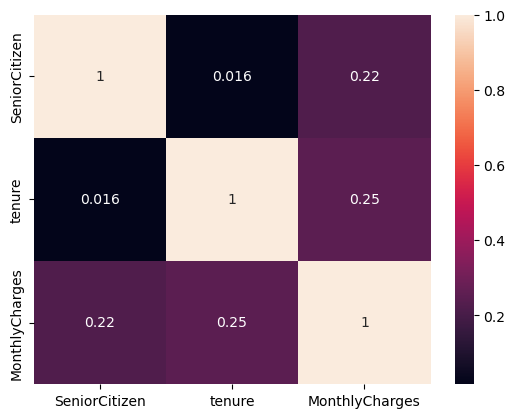

In [27]:
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True)

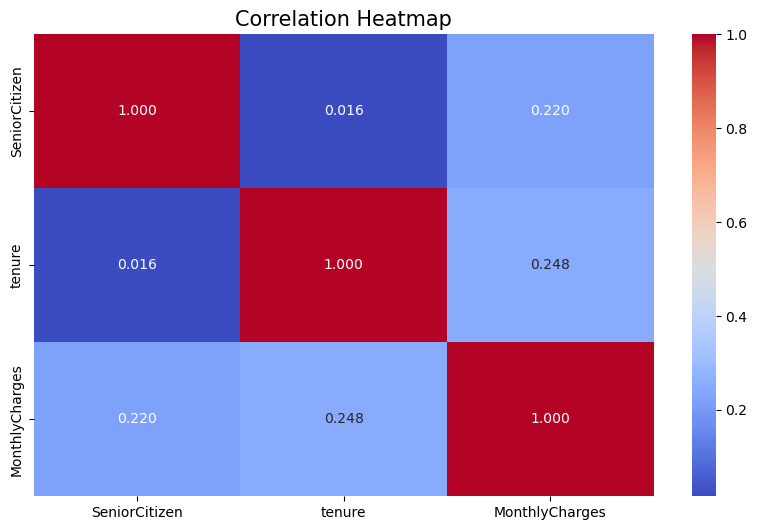

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm',cbar=True,fmt='.3f')


plt.title('Correlation Heatmap', fontsize=15)
plt.show()

## Preproceess the dataset

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
df.drop(['customerID'],axis=1,inplace=True)

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Encode the Dataset

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label=LabelEncoder()

In [34]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [35]:
from pandas.core.dtypes.common import is_numeric_dtype

In [36]:
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=label.fit_transform(df[column])

In [37]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


Separe x,y

In [38]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [39]:
x.shape

(7043, 19)

In [40]:
y.shape

(7043,)

In [41]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

## Handling Imbalanced Dataset

In [42]:
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [43]:
not_churn=(5174/7043)*100
churn=(1869/7043)*100

print('Not churn {} percent of people'.format(not_churn))
print('Churn {} percent of people'.format(churn))

Not churn 73.4630129206304 percent of people
Churn 26.536987079369588 percent of people


## SMOTETomek

## SMOTE: will equal the minority class data to majority class.
## Tomek: After doing SMOTE It will remove the data of majority and minority class which are very close to each other.Because it will create confusion whether it is yes/no or male/female

In [44]:
! pip install imblearn

In [45]:
from imblearn.combine import SMOTETomek

In [46]:
st=SMOTETomek(random_state=1)

In [47]:
y.value_counts() ## before sampling

Churn
0    5174
1    1869
Name: count, dtype: int64

In [48]:
X,Y = st.fit_resample(x,y)

In [49]:
X.shape  

(9570, 19)

## here data should be 10,348 but some values has been removed because those values were really close to each other and it will create problem in giving good accuracy

In [50]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [51]:
Y.shape  

(9570,)

In [52]:
Y.value_counts()

Churn
0    4785
1    4785
Name: count, dtype: int64

## Near miss for undersampling

## Near miss is an undersampling technique

In [53]:
from imblearn.under_sampling import NearMiss

In [54]:
near_miss_obj= NearMiss()

In [55]:
new_x,new_y=near_miss_obj.fit_resample(x,y)

In [56]:
df.Churn.shape

(7043,)

In [57]:
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [58]:
new_x.shape

(3738, 19)

In [59]:
new_y.shape

(3738,)

In [60]:
new_y.value_counts()

Churn
0    1869
1    1869
Name: count, dtype: int64

## Random Oversampling

In [61]:
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [62]:
from imblearn.over_sampling import RandomOverSampler

In [63]:
over_samp_obj= RandomOverSampler()

In [64]:
new_x1,new_y1=over_samp_obj.fit_resample(x,y)

In [65]:
new_x1.shape

(10348, 19)

In [66]:
new_y1.shape

(10348,)

In [67]:
new_y1.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

## Without sampling / Before Sampling

In [70]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,train_size=0.75,random_state=1)

Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
linear_obj=LinearRegression()

In [ ]:
linear_obj.fit(xtrain1,ytrain1)

LinearRegression()

In [75]:
linear_obj.score(xtrain1,ytrain1)

0.26634384137840106

In [76]:
linear_obj.score(xtest1,ytest1)

0.27307873135387684

XGBOOST Classifier

In [ ]:
# ! pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 799.2 kB/s eta 0:01:30
   ---------------------------------------- 0.8/72.0 MB 780.2 kB/s eta 0:01:32
   ---------------------------------------- 0.8/72.0 MB 780.2 kB/s eta 0:01:32
    --------------------------------------- 1.0/72.0 MB 762.8 kB/s eta 0:01:33
    --------------------------------------- 1.0/72.0 MB 762.8 kB/s eta 0:01:33
    --------------------------------------- 1.3/72.0 MB 762.6 kB/s eta 0:01:33
    --------------------------------------- 1.3/72.0 MB 762.6 kB/s eta 0:01:33
    --------------------------------------- 1.6/72.0 MB 660.6 kB/s eta 0:01:47
   - -------------------------------------- 1.8/72.0 MB 745.8 kB/s eta 0:01:35
   - -------------------------------------- 1.8/72.0 MB 745.8 kB/s eta 0:01:35


In [81]:
import xgboost
from xgboost import XGBClassifier

In [82]:
xgb_obj=XGBClassifier()

In [84]:
xgb_obj.fit(xtrain1,ytrain1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [85]:
xgb_obj.score(xtest1,ytest1)

0.794434980124929

In [86]:
xgb_obj.score(xtrain1,ytrain1)

0.9598636879969709

## With Sampling / After sampling 

In [87]:
xtrain2,xtest2,ytrain2,ytest2=train_test_split(X,Y,train_size=0.75,random_state=1)

Logistic regression

In [88]:
linear_obj.fit(xtrain2,ytrain2)

LinearRegression()

In [90]:
linear_obj.score(xtest2,ytest2)

0.4876705364675008

In [91]:
linear_obj.score(xtrain2,ytrain2)

0.45811247653753473

XGBoost

In [92]:
xgb_obj.fit(xtrain2,ytrain2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [93]:
xgb_obj.score(xtest2,ytest2)

0.8696197241955704

In [94]:
xgb_obj.score(xtrain2,ytrain2)

0.9712971993869305